# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [7]:
'''
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

'''

'\n!pip install --upgrade numpy==1.26.4\n!pip install --upgrade pandas==2.2.2\n!pip install --upgrade nltk==3.9.1\n!pip install --upgrade spacy==3.7.5\n!pip install --upgrade scipy==1.12\n!pip install --upgrade pydantic==2.10.5\n!pip install wordcloud==1.9.4\n!python -m spacy download en_core_web_sm\n\n'

## Importing the necessary libraries

In [8]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [9]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [10]:
# Import the first file - True.csv
true_df = pd.read_csv('True.csv')

# Import the second file - Fake.csv
fake_df = pd.read_csv('Fake.csv')


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [11]:
# Inspect the DataFrame with True News to understand the given data
true_df.head()


,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [12]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [13]:
# Print the column details for True News DataFrame
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [14]:
# Print the column details for Fake News Dataframe
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [15]:
# Print the column names of both DataFrames

print(f"Column names in True News DataFrame: {true_df.columns}")
print(f"Column names in Fake News DataFrame: {fake_df.columns}")

Column names in True News DataFrame: Index(['title', 'text', 'date'], dtype='object')
Column names in Fake News DataFrame: Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [16]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [17]:
# Combine the true and fake news DataFrames into a single DataFrame

news_df = pd.concat([true_df, fake_df], ignore_index=True)


In [18]:
# Display the first 5 rows of the combined DataFrame to verify the result

news_df.head(5)


,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [19]:
# Check Presence of Null Values
news_df.isnull().mean()*100


title         0.046729
text          0.046729
date          0.093458
news_label    0.000000
dtype: float64

In [20]:
# Handle Rows with Null Values
news_df.dropna(inplace=True)


In [21]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   date        44898 non-null  object
 3   news_label  44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [22]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_df['news_text'] = news_df['title'] + ' ' + news_df['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_df.drop(columns=['title','text','date'], inplace=True)

# Display the first 5 rows of the updated DataFrame to check the result
news_df.head(5)

,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [23]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame(columns=['news_text'])

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = news_df['news_label']


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [24]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers

def clean_text(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [25]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['clean_text'] = news_df['news_text'].apply(clean_text)


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [76]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

def pos_tag_lemma_func(text):
  # Check if text is NaN or not a string
  if pd.isna(text) or not isinstance(text, str):
    return ""
  doc = nlp(text)
  tokens = [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'PROPN']]
  return ' '.join(tokens)  


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

#### df_clean['lemmatized_text'] = df_clean['clean_text'].apply(pos_tag_lemma_func)


### Save the Cleaned data as a csv file (Recommended)

In [78]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [80]:
# Check the first few rows of the DataFrame

df_clean.head()

,news_text,news_label,clean_text,lemmatized_text,clean_text_length,lemmatized_text_length
0,NaN,1,as us budget fight looms republicans flip thei...,budget fight republicans script washington reu...,4570,4570
1,NaN,1,us military to accept transgender recruits on ...,us military transgender recruit monday pentago...,4046,4046
2,NaN,1,senior us republican senator let mr mueller do...,us senator mr mueller job washington reuters c...,2789,2789
3,NaN,1,fbi russia probe helped by australian diplomat...,fbi russia probe diplomat tipoff nyt washingto...,2458,2458
4,NaN,1,trump wants postal service to charge much more...,trump service amazon shipment seattlewashingto...,5074,5074


In [81]:
# Check the dimensions of the DataFrame

df_clean.shape

(44898, 6)

In [82]:
# Check the number of non-null entries and data types of each column

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   news_text               0 non-null      float64
 1   news_label              44898 non-null  int64  
 2   clean_text              44898 non-null  object 
 3   lemmatized_text         44888 non-null  object 
 4   clean_text_length       44898 non-null  int64  
 5   lemmatized_text_length  44898 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.1+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [83]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data

from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=56)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [86]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   news_text               0 non-null      float64
 1   news_label              44898 non-null  int64  
 2   clean_text              44898 non-null  object 
 3   lemmatized_text         44888 non-null  object 
 4   clean_text_length       44898 non-null  int64  
 5   lemmatized_text_length  44898 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.1+ MB


In [90]:
# Add a new column to calculate the character length of cleaned news text
df_clean['clean_text_length'] = df_clean['clean_text'].apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['lemmatized_text_length'] = df_clean['clean_text'].apply(len)


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

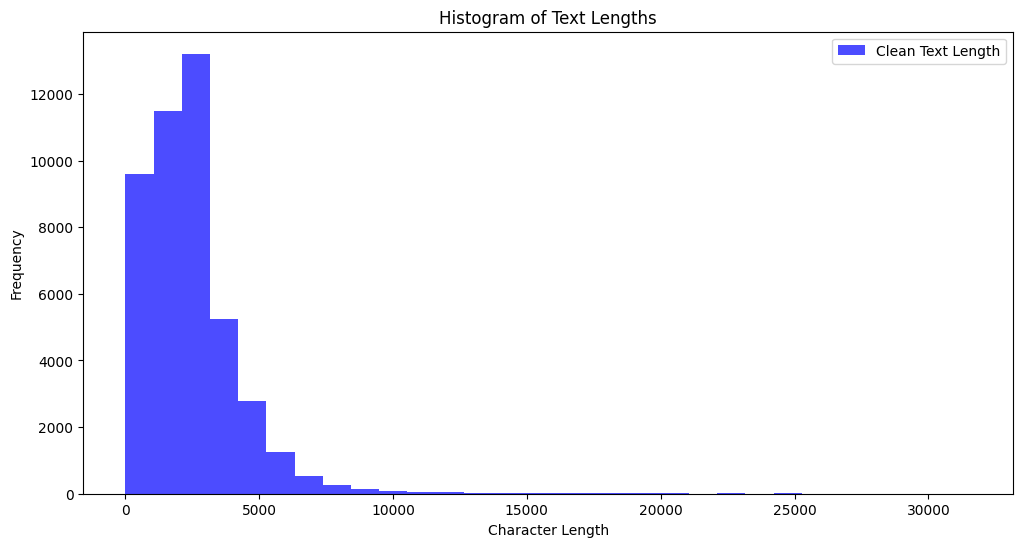

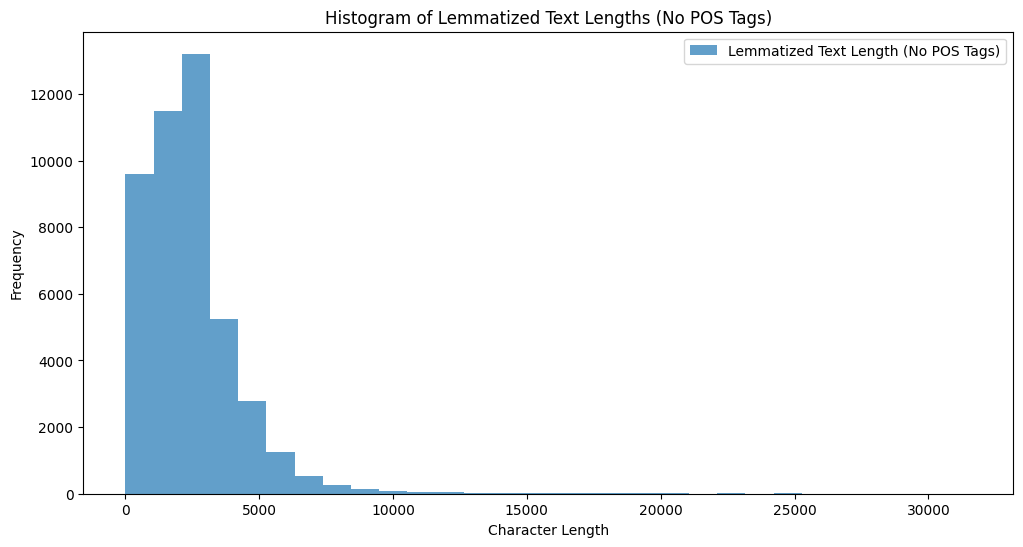

In [93]:
# Create a histogram plot to visualise character lengths
import matplotlib.pyplot as plt
from narwhals import col

# Add histogram for cleaned news text
plt.figure(figsize=(12, 6))
plt.hist(df_clean['clean_text_length'], bins=30, alpha=0.7, label='Clean Text Length', color='blue')
plt.title('Histogram of Text Lengths')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(12, 6))
plt.hist(df_clean['lemmatized_text_length'], bins=30, alpha=0.7, label='Lemmatized Text Length (No POS Tags)')
plt.title('Histogram of Lemmatized Text Lengths (No POS Tags)')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [96]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud 

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = train_df[train_df['news_label'] == 1]['lemmatized_text'].astype(str)

# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(true_news_text))

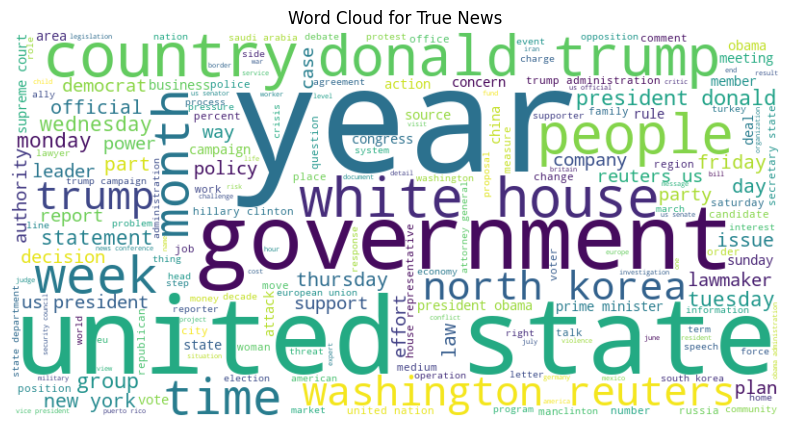

In [98]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(true_news_text))
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for True News')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

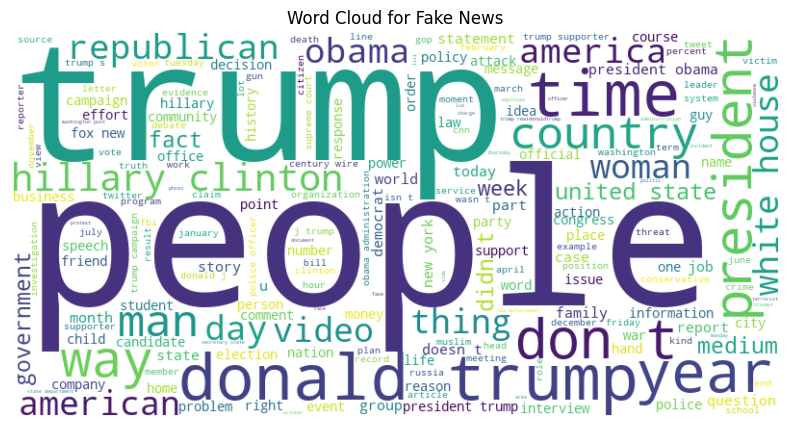

In [99]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = train_df[train_df['news_label'] == 0]['lemmatized_text'].astype(str)

# Generate word cloud for Fake News
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fake_news_text))
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Fake News')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [100]:
# Write a function to get the specified top n-grams
def get_top_ngrams(text_series, n=1, top_n=40):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(text_series)
    ngram_counts = np.asarray(X.sum(axis=0)).flatten()
    ngram_features = vectorizer.get_feature_names_out()
    
    # Create a DataFrame for better visualization
    ngram_df = pd.DataFrame({'ngram': ngram_features, 'count': ngram_counts})
    top_ngrams = ngram_df.nlargest(top_n, 'count')
    
    return list(zip(top_ngrams['ngram'], top_ngrams['count']))


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [101]:
# Handle NaN values in the text data
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna('')


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News: [('trump', 37212), ('president', 19229), ('state', 17021), ('reuters', 14490), ('government', 13692), ('year', 13237), ('house', 12731), ('people', 10704), ('united', 10615), ('party', 10498)]


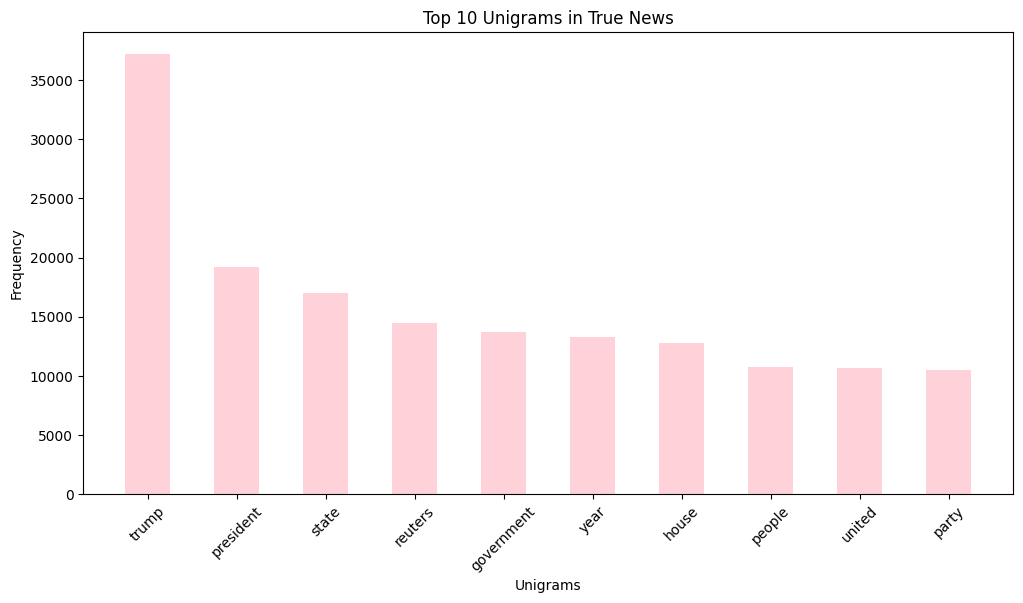

In [106]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

top_unigrams_true = get_top_ngrams(train_df[train_df['news_label'] == 1]['lemmatized_text'], n=1, top_n=10)
print(f"Top 10 Unigrams in True News: {top_unigrams_true}")
# Plotting the top unigrams in true news
plt.figure(figsize=(12, 6))
plt.bar([x[0] for x in top_unigrams_true], [x[1] for x in top_unigrams_true], color='pink', alpha=0.7, width=0.5)
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News: [('united states', 8459), ('donald trump', 6708), ('white house', 6324), ('washington reuters', 4546), ('north korea', 4322), ('president donald', 4203), ('new york', 3139), ('prime minister', 2171), ('president obama', 2148), ('supreme court', 1856)]


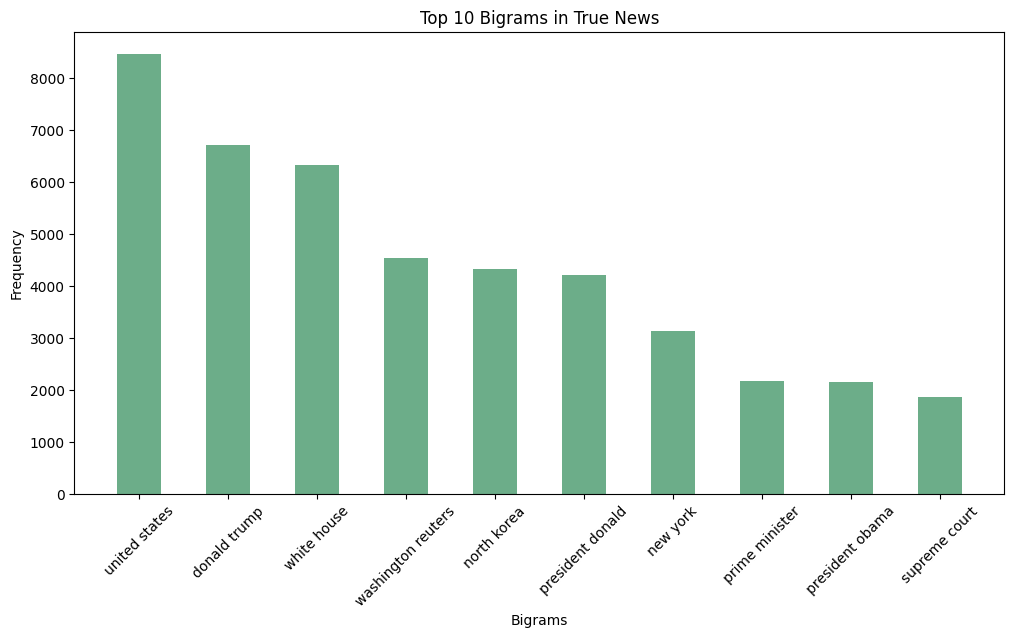

In [108]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams_true = get_top_ngrams(train_df[train_df['news_label'] == 1]['lemmatized_text'], n=2, top_n=10)
print(f"Top 10 Bigrams in True News: {top_bigrams_true}")
# Plotting the top bigrams in true news
plt.figure(figsize=(12, 6))
plt.bar([x[0] for x in top_bigrams_true], [x[1] for x in top_bigrams_true], color='seagreen', alpha=0.7, width=0.5)
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News: [('president donald trump', 3974), ('reuters president donald', 1080), ('washington reuters president', 962), ('president vladimir putin', 550), ('new york reuters', 511), ('north korea missile', 467), ('state rex tillerson', 464), ('secretary state rex', 463), ('speaker paul ryan', 418), ('leader mitch mcconnell', 399)]


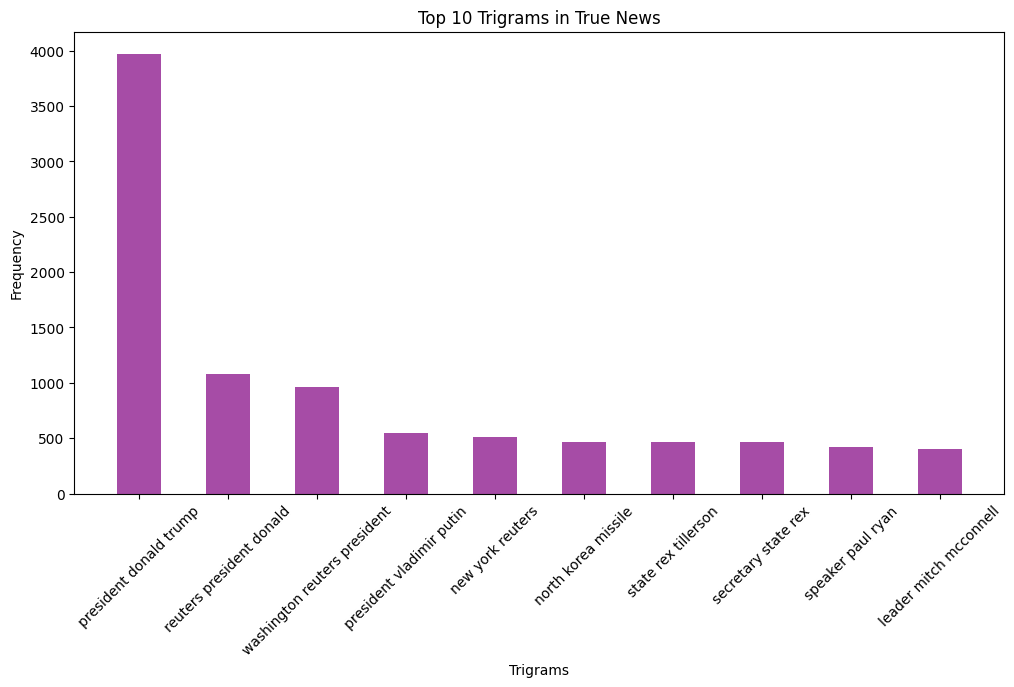

In [110]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams_true = get_top_ngrams(train_df[train_df['news_label'] == 1]['lemmatized_text'], n=3, top_n=10)
print(f"Top 10 Trigrams in True News: {top_trigrams_true}")
# Plotting the top trigrams in true news
plt.figure(figsize=(12, 6))
plt.bar([x[0] for x in top_trigrams_true], [x[1] for x in top_trigrams_true], color='purple', alpha=0.7, width=0.5)
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News: [('trump', 50687), ('president', 19013), ('people', 18317), ('obama', 14278), ('clinton', 13495), ('donald', 12464), ('time', 11151), ('state', 10732), ('hillary', 10526), ('news', 10494)]


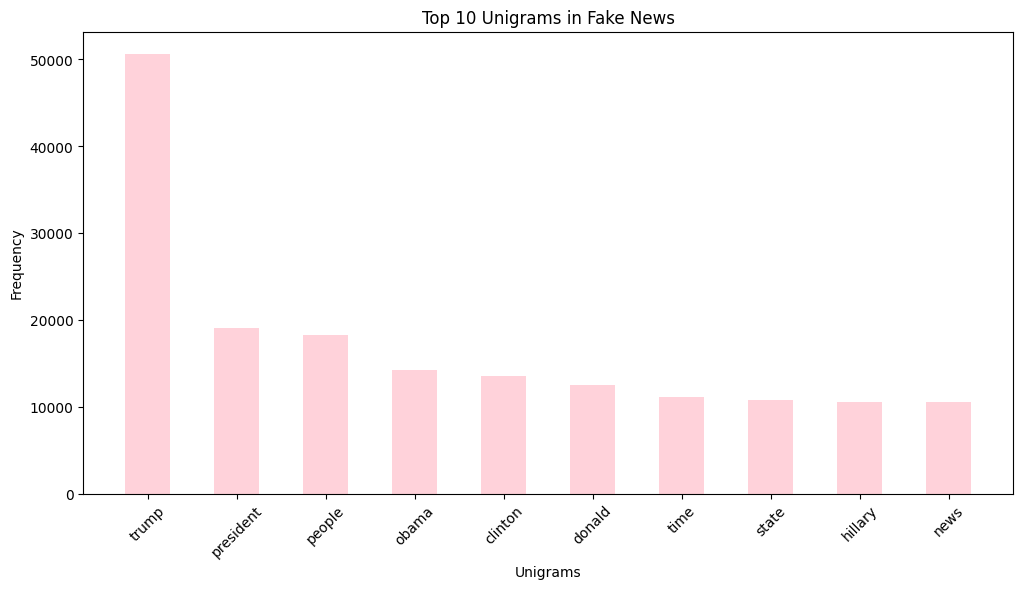

In [112]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(train_df[train_df['news_label'] == 0]['lemmatized_text'], n=1, top_n=10)
print(f"Top 10 Unigrams in Fake News: {top_unigrams_fake}")
# Plotting the top unigrams in fake news
plt.figure(figsize=(12, 6))
plt.bar([x[0] for x in top_unigrams_fake], [x[1] for x in top_unigrams_fake], color='pink', alpha=0.7, width=0.5)
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News: [('donald trump', 10351), ('hillary clinton', 4946), ('white house', 4485), ('united states', 4191), ('president obama', 3433), ('new york', 2936), ('president trump', 2620), ('fox news', 2404), ('trump supporter', 1597), ('trump campaign', 1549)]


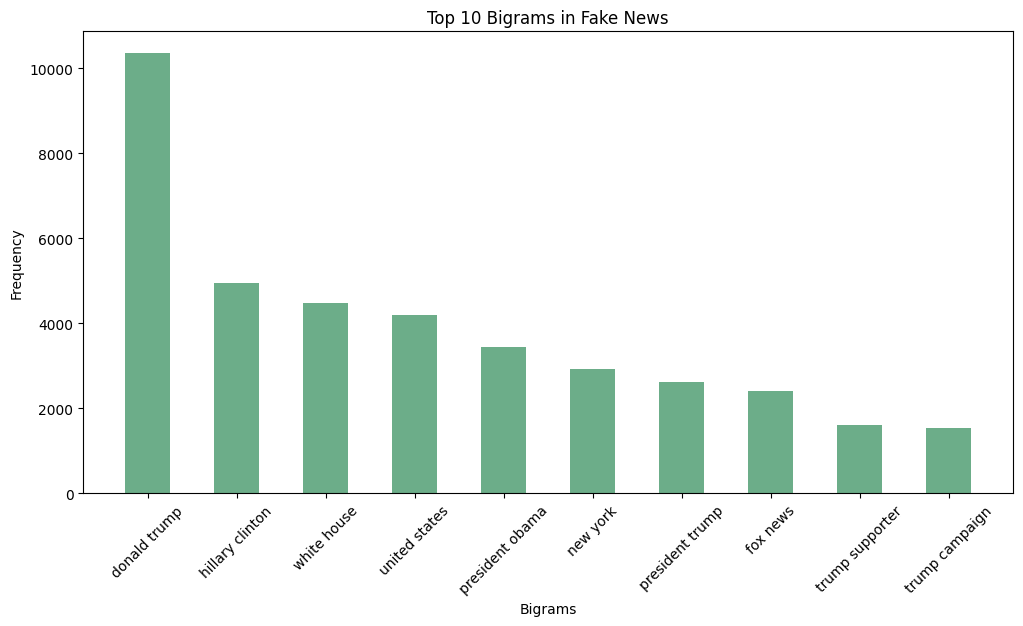

In [113]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(train_df[train_df['news_label'] == 0]['lemmatized_text'], n=2, top_n=10)
print(f"Top 10 Bigrams in Fake News: {top_bigrams_fake}")
# Plotting the top bigrams in fake news
plt.figure(figsize=(12, 6))
plt.bar([x[0] for x in top_bigrams_fake], [x[1] for x in top_bigrams_fake], color='seagreen', alpha=0.7, width=0.5)
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News: [('donald trump realdonaldtrump', 1130), ('new york times', 1012), ('news century wire', 685), ('president united states', 637), ('president donald trump', 623), ('video screen capture', 510), ('image video screen', 490), ('new york city', 405), ('director james comey', 355), ('fbi director james', 347)]


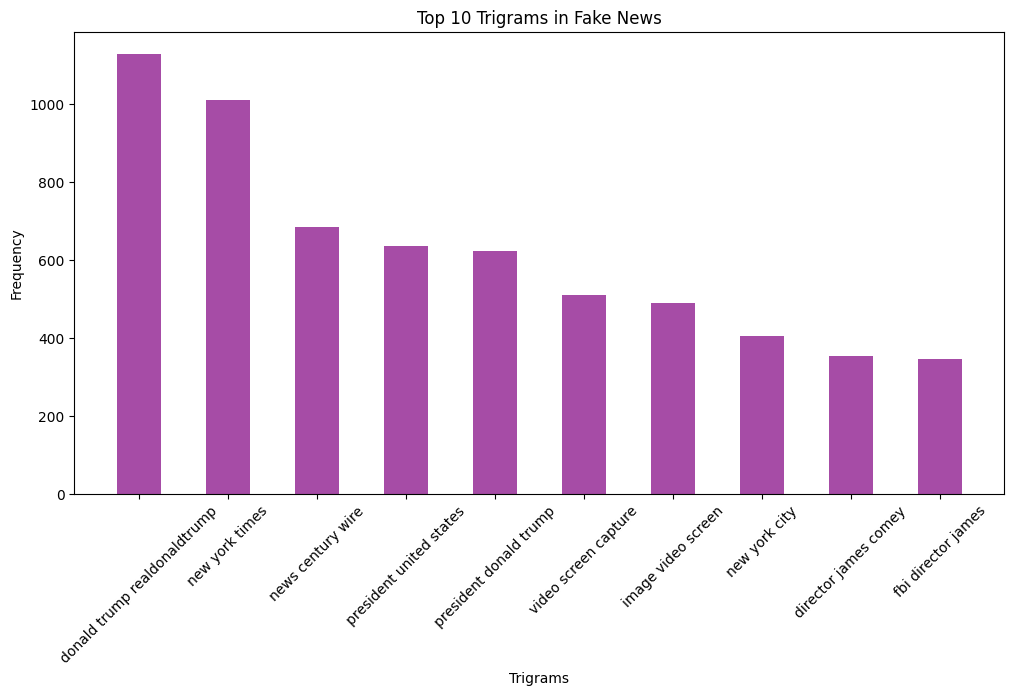

In [114]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(train_df[train_df['news_label'] == 0]['lemmatized_text'], n=3, top_n=10)
print(f"Top 10 Trigrams in Fake News: {top_trigrams_fake}")
# Plotting the top trigrams in fake news
plt.figure(figsize=(12, 6))
plt.bar([x[0] for x in top_trigrams_fake], [x[1] for x in top_trigrams_fake], color='purple', alpha=0.7, width=0.5)
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [45]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [46]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [47]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [48]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [49]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [50]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [51]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [52]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [53]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [54]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [55]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [56]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [116]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

# Download and load the pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

# Check if the model is loaded correctly by printing the model's vocabulary size
print(f"Word2Vec model loaded with vocabulary size: {len(word2vec_model.key_to_index)}")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec model loaded with vocabulary size: 3000000


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [117]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def get_word2vec_vectors(text_series, model):
    vectors = []
    for text in text_series:
        if pd.isna(text) or not isinstance(text, str):
            vectors.append(np.zeros(model.vector_size))  # Append zero vector for NaN or non-string
            continue
        words = text.split()
        word_vectors = [model[word] for word in words if word in model.key_to_index]
        if word_vectors:
            vectors.append(np.mean(word_vectors, axis=0))  # Average the word vectors
        else:
            vectors.append(np.zeros(model.vector_size))  # Append zero vector if no words found
    return np.array(vectors)


## Extract the target variable for the training data and validation data
train_y = train_df['news_label'].values
val_y = val_df['news_label'].values


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [119]:
## Initialise Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=56)

## Train Logistic Regression model on training data
logistic_model.fit(get_word2vec_vectors(train_df['lemmatized_text'], word2vec_model), train_y)

## Predict on validation data
val_predictions = logistic_model.predict(get_word2vec_vectors(val_df['lemmatized_text'], word2vec_model))


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [120]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(val_y, val_predictions)
precision = precision_score(val_y, val_predictions)
recall = recall_score(val_y, val_predictions)
f1 = f1_score(val_y, val_predictions)
print(f"Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Logistic Regression - Accuracy: 0.9330, Precision: 0.9272, Recall: 0.9331, F1 Score: 0.9302


In [121]:
# Classification Report

print(classification_report(val_y, val_predictions, target_names=['Fake News', 'True News']))


              precision    recall  f1-score   support

   Fake News       0.94      0.93      0.94      7025
   True News       0.93      0.93      0.93      6445

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [122]:
## Initialise Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=56)

## Train Decision Tree model on training data
decision_tree_model.fit(get_word2vec_vectors(train_df['lemmatized_text'], word2vec_model), train_y)

## Predict on validation data
val_predictions = decision_tree_model.predict(get_word2vec_vectors(val_df['lemmatized_text'], word2vec_model))


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [123]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(val_y, val_predictions)
precision = precision_score(val_y, val_predictions)
recall = recall_score(val_y, val_predictions)
f1 = f1_score(val_y, val_predictions)
print(f"Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Logistic Regression - Accuracy: 0.8527, Precision: 0.8582, Recall: 0.8292, F1 Score: 0.8434


In [124]:
# Classification Report
print(classification_report(val_y, val_predictions, target_names=['Fake News', 'True News']))


              precision    recall  f1-score   support

   Fake News       0.85      0.87      0.86      7025
   True News       0.86      0.83      0.84      6445

    accuracy                           0.85     13470
   macro avg       0.85      0.85      0.85     13470
weighted avg       0.85      0.85      0.85     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [125]:
## Initialise Random Forest model
random_forest_model = RandomForestClassifier(random_state=56, n_estimators=100)

## Train Random Forest model on training data
random_forest_model.fit(get_word2vec_vectors(train_df['lemmatized_text'], word2vec_model), train_y)

## Predict on validation data
val_predictions = random_forest_model.predict(get_word2vec_vectors(val_df['lemmatized_text'], word2vec_model))


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [126]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(val_y, val_predictions)
precision = precision_score(val_y, val_predictions)
recall = recall_score(val_y, val_predictions)
f1 = f1_score(val_y, val_predictions)
print(f"Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Logistic Regression - Accuracy: 0.9298, Precision: 0.9348, Recall: 0.9171, F1 Score: 0.9259


In [127]:
# Classification Report
print(classification_report(val_y, val_predictions, target_names=['Fake News', 'True News']))


              precision    recall  f1-score   support

   Fake News       0.93      0.94      0.93      7025
   True News       0.93      0.92      0.93      6445

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

In [129]:
# get the metrics from all models in a dictionary for easy comparison
